# SNPs

## Inputs

In [1]:
source('jupyterFunctions_broadCellType.R')
source('jupyterFunctions_perCellType.R')

In [2]:
CT <- 'SNPs'
data_prefix <- paste(sep='','../data/',CT,'/')
ATAC_pxCT_norm <- readRDS(paste(sep='',data_prefix,'ATAC_pxc_afc_SNPpeaks_pxCT_norm.rds'))
chosenSNPs <- readRDS(paste(sep='',data_prefix,'ATAC_chosenSNPs.rds'))

In [3]:
ATAC_colors <- readRDS('../data/misc/ATAC_class_colors.rds')

In [15]:
save_dir <- NA #'../output_v9/' #or NA if don't want to save
file_extension <- '.pdf'

## SNP matrix

In [5]:
class_order <- c('TA-0','TA-4','TA-1','TA-2','TA-3',
                 'BA-3','BA-4','BA-2','BA-5','BA-0','BA-1',
                 'MA-0','MA-2','MA-4','MA-1','MA-3',
                 'EA-2','EA-3','EA-0','EA-1',
                 'SA-1','SA-2','SA-0','SA-3')
if(!all(class_order %in% colnames(ATAC_pxCT_norm))) stop('not all classes in pxCT')
if(!all(class_order %in% names(ATAC_colors))) stop('not all classes in colors')

if(!all(unname(chosenSNPs) %in% rownames(ATAC_pxCT_norm))) stop('not all chosen SNPs in pxCT')

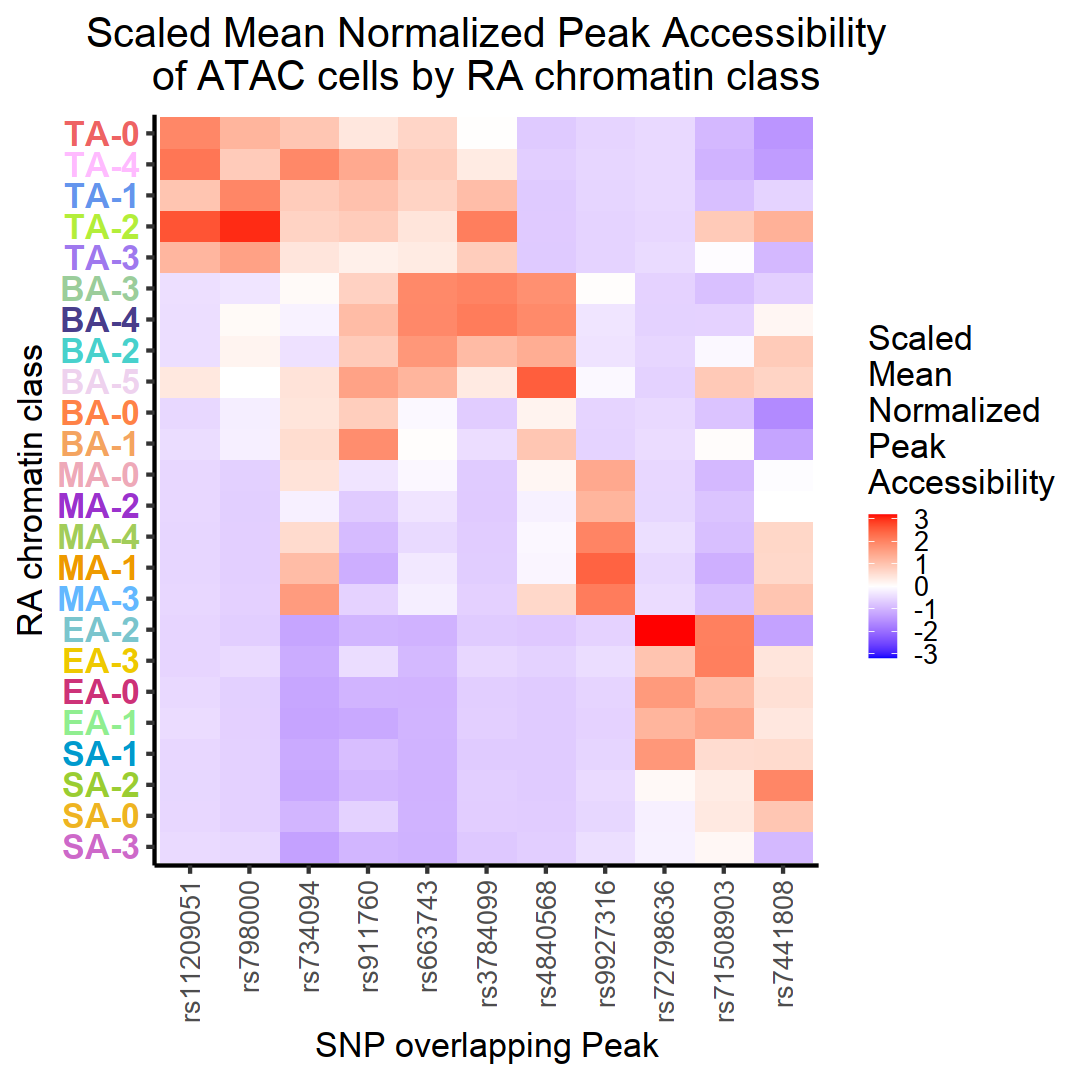

In [6]:
#Fig 8d

ATAC_pxCT_norm_subset_scaled <- scalePeak_forHeatmap(names(chosenSNPs),class_order,chosenSNPs,ATAC_pxCT_norm)

options(repr.plot.height=9,repr.plot.width=9)
g <- pseudobulk_scaled_heatmap(ATAC_pxCT_norm_subset_scaled,'SNP overlapping Peak','RA chromatin class',
                               'Scaled\nMean\nNormalized\nPeak\nAccessibility',
                               plotTit='Scaled Mean Normalized Peak Accessibility\nof ATAC cells by RA chromatin class',
                               scale_lim=max(abs(ATAC_pxCT_norm_subset_scaled)),clustColors=ATAC_colors)
print(g)
if(!is.na(save_dir)) ggsave(file=paste(sep='',save_dir,'ATAC_SNP_markerPeak_heatmap',file_extension),
                            plot=g,units='in',height=9,width=9,dpi=600)


In [7]:
#Table S8

class_overlaps <- as.data.frame(rev(apply(ATAC_pxCT_norm_subset_scaled,1,function(x){paste(names(x[x>1]),collapse=', ')})),
                                stringsAsFactors=FALSE)
colnames(class_overlaps) <- c('classOL')
class_overlaps

,classOL
,<chr>
rs11209051,"TA-3, TA-2, TA-4, TA-0"
rs798000,"TA-3, TA-2, TA-1, TA-0"
rs734094,"MA-3, MA-1, TA-4"
rs911760,"BA-1, BA-5, BA-4, TA-1, TA-4"
rs663743,"BA-5, BA-2, BA-4, BA-3"
rs3784099,"BA-2, BA-4, BA-3, TA-2, TA-1"
rs4840568,"BA-5, BA-2, BA-4, BA-3"
rs9927316,"MA-3, MA-1, MA-4, MA-2, MA-0"
rs72798636,"SA-1, EA-1, EA-0, EA-2"


## Wilcoxon tests

In [8]:
classCT_conv <- c('stromal','endothelial','myeloid','Bplasma','Tcell')
names(classCT_conv) <- c('S','E','M','B','T')

snps_gathered <- gather_SNPs(ATAC_pxCT_norm_subset_scaled,chosenSNPs,classCT_conv)

In [9]:
within <- snps_gathered[which(snps_gathered$rsID=='rs11209051' & snps_gathered$cellType=='Tcell'),'norm_pxCTmean_scale']
without <- snps_gathered[which(snps_gathered$rsID=='rs11209051' & snps_gathered$cellType!='Tcell'),'norm_pxCTmean_scale']

wilcox.test(within,without,alternative = "greater")

Warning message in wilcox.test.default(within, without, alternative = "greater"):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  within and without
W = 95, p-value = 0.0004165
alternative hypothesis: true location shift is greater than 0


In [10]:
within <- snps_gathered[which(snps_gathered$rsID=='rs4840568' & snps_gathered$cellType=='Bplasma'),'norm_pxCTmean_scale']
without <- snps_gathered[which(snps_gathered$rsID=='rs4840568' & snps_gathered$cellType!='Bplasma'),'norm_pxCTmean_scale']

wilcox.test(within,without,alternative = "greater")


	Wilcoxon rank sum test

data:  within and without
W = 107, p-value = 1.486e-05
alternative hypothesis: true location shift is greater than 0


In [11]:
within <- snps_gathered[which(snps_gathered$rsID=='rs798000' & snps_gathered$cellType=='Tcell'),'norm_pxCTmean_scale']
without <- snps_gathered[which(snps_gathered$rsID=='rs798000' & snps_gathered$cellType!='Tcell'),'norm_pxCTmean_scale']

wilcox.test(within,without,alternative = "greater")


	Wilcoxon rank sum test

data:  within and without
W = 95, p-value = 2.353e-05
alternative hypothesis: true location shift is greater than 0


In [12]:
within <- snps_gathered[which(snps_gathered$rsID=='rs9927316' & snps_gathered$cellType=='myeloid'),'norm_pxCTmean_scale']
without <- snps_gathered[which(snps_gathered$rsID=='rs9927316' & snps_gathered$cellType!='myeloid'),'norm_pxCTmean_scale']

wilcox.test(within,without,alternative = "greater")

Warning message in wilcox.test.default(within, without, alternative = "greater"):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  within and without
W = 95, p-value = 0.0004165
alternative hypothesis: true location shift is greater than 0


In [13]:
within <- snps_gathered[which(snps_gathered$rsID=='rs734094' & (snps_gathered$cellType %in% c('myeloid','Tcell'))),
                        'norm_pxCTmean_scale']
without <- snps_gathered[which(snps_gathered$rsID=='rs734094' & !(snps_gathered$cellType %in% c('myeloid','Tcell'))),
                         'norm_pxCTmean_scale']

wilcox.test(within,without,alternative = "greater")


	Wilcoxon rank sum test

data:  within and without
W = 131, p-value = 4.946e-05
alternative hypothesis: true location shift is greater than 0


## Session Info

In [14]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server release 6.5 (Santiago)

Matrix products: default
BLAS/LAPACK: /PHShome/kew47/miniconda3/lib/R/lib/libRblas.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] repr_1.0.1         gridExtra_2.3      RColorBrewer_1.1-2 scales_1.1.1      
 [5] viridis_0.5.1      viridisLite_0.3.0  ggrepel_0.8.2      ggrastr_0.2.3     
 [9] stringr_1.4.0      ggpubr_0.4.0       presto_1.0.0       Rcpp_1.0.4.6      
[13] ROCR_1.0-7         gplots_3.0.1.1     Rmisc_1.5.1        plyr_1.8.6        
[17] lattice_0.20-41    gtools_3.8.2       tidyr_1.0.3        Matrix_1.2-18     
[21] ggplot2_3.3.0     

loaded via a namespace (and not attached):
 [1] digest_0.6.25       IRdisplay_0.7.0     R6_2.4.1           
 [4] cellranger_1.1.0    backports_1.1.6     evaluate_0.14      
